<a href="https://colab.research.google.com/github/FatmaAMR/Cherenkov-Telescope-problem---Data-Classification-Model/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAGIC Gamma Telescope problem**


---


##**🔭 Gamma/Hadron Classification Using Cherenkov Telescope Data**


In this notebook, I build a complete supervised machine learning pipeline to solve a binary classification problem in the domain of high-energy astrophysics. The task is to distinguish between ***gamma rays (signal)*** and ***hadron showers (background)*** using simulated data from a Cherenkov telescope. These particles create distinctive shower patterns captured in the telescope's camera, and the dataset contains features extracted from those patterns (e.g., length, width, asymmetry, etc.).

##**🎯 Goal**

To develop, evaluate, and compare machine learning models that can effectively classify whether a recorded event is a gamma ray or a hadron, based on physical features derived from image processing of the Cherenkov radiation


### *meta:* [*UCA Dataset info.*](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)


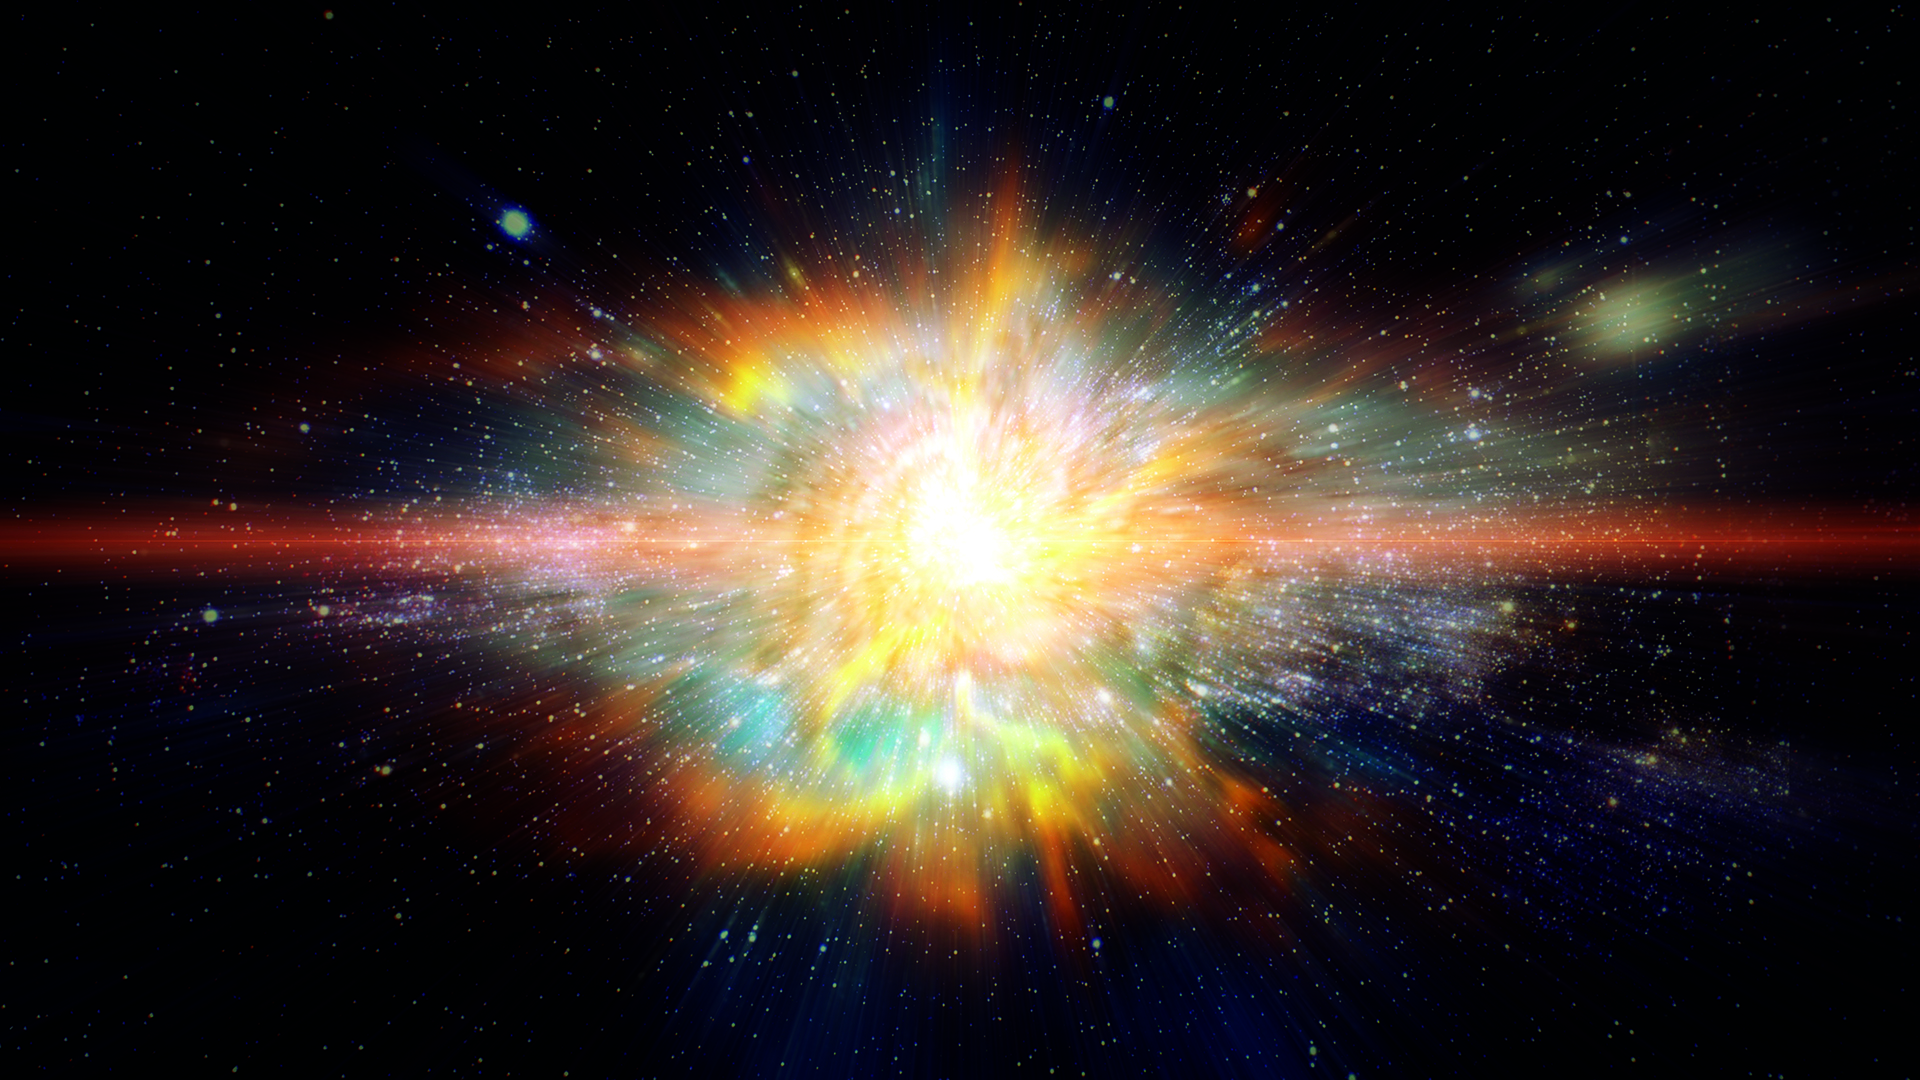

## **Data understanding and preparing**

- Data Collection
- Data Cleaning and Labeling


In [8]:
import numpy as np
!pip install ucimlrepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
cols = ["flength", "fWidth", "fSize", "fConc","fConc1","fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class" ]
df=pd.read_csv("magic04.data", names=cols)
df.head()

flength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [12]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [14]:
df["class"]=(df["class"]=="g").astype(int)
df

flength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      0  
1       -9.9574   6.3609  205.2610      0  
2      -45.2160  76.9600  256.7880      0  
3       -7.1513  10.4490  116.7370      0  
4       21.8393   4.6480  356.4620      0  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


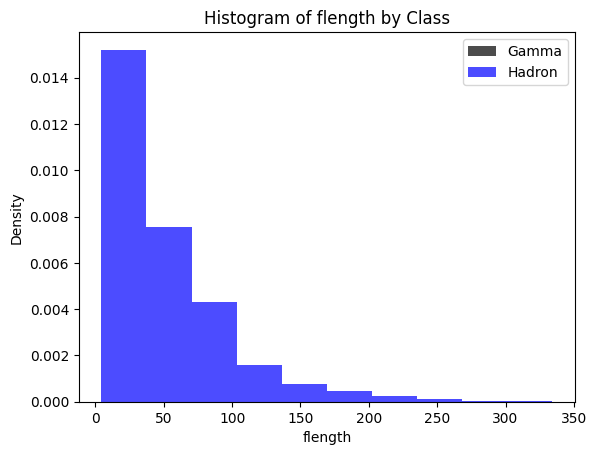

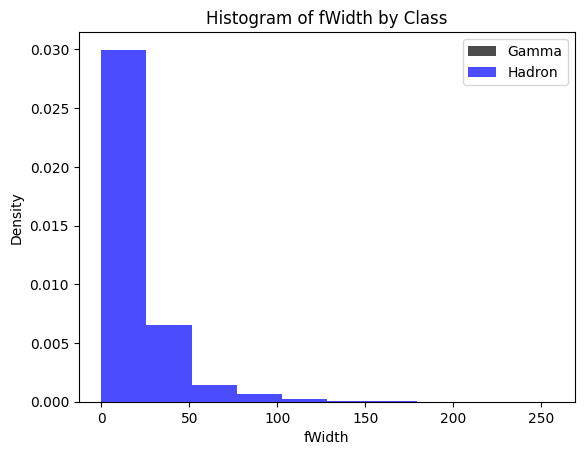

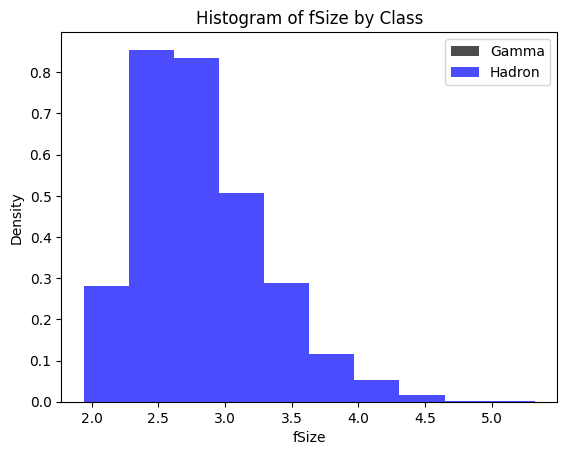

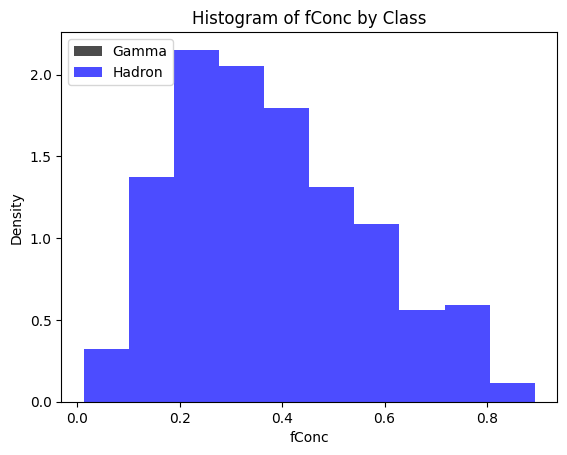

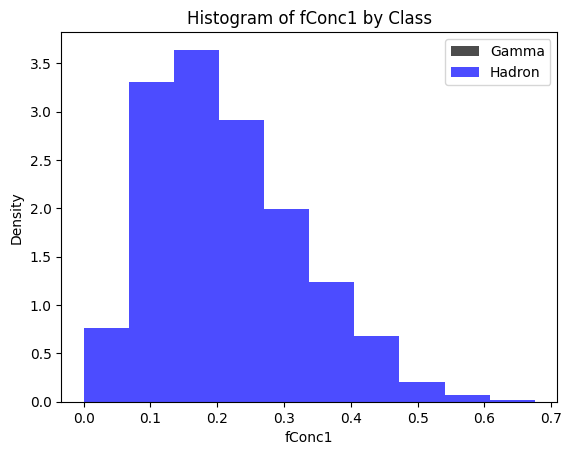

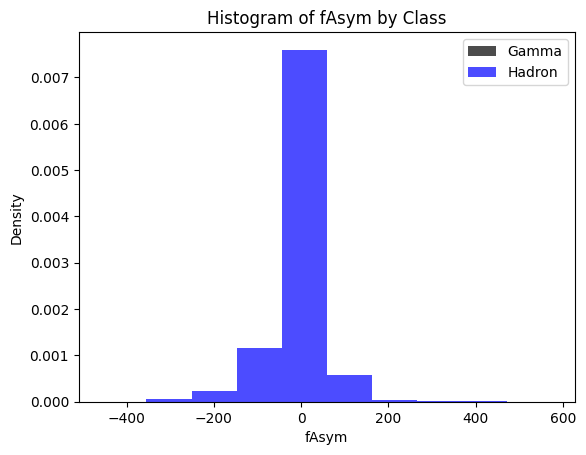

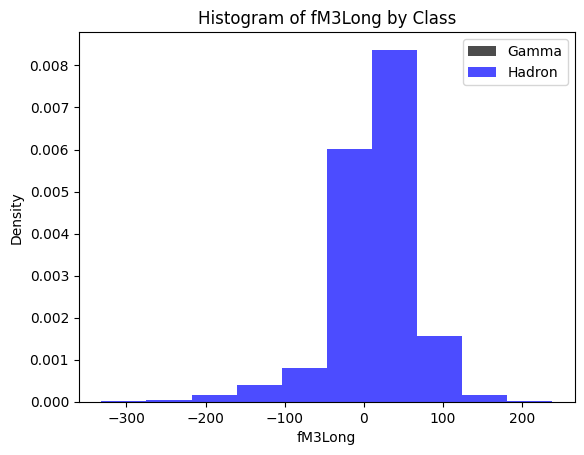

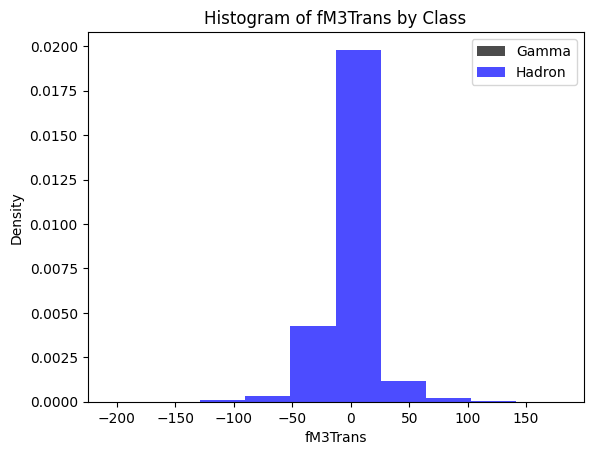

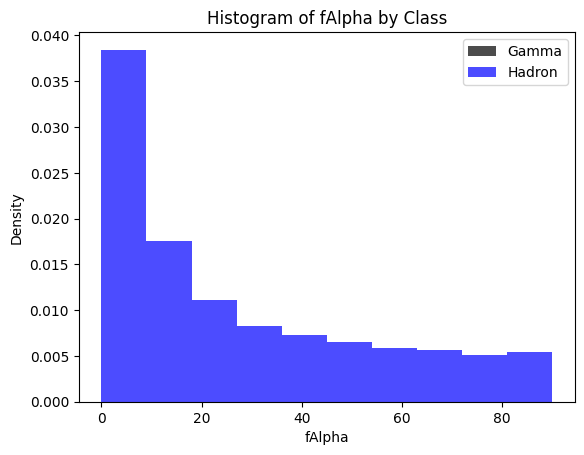

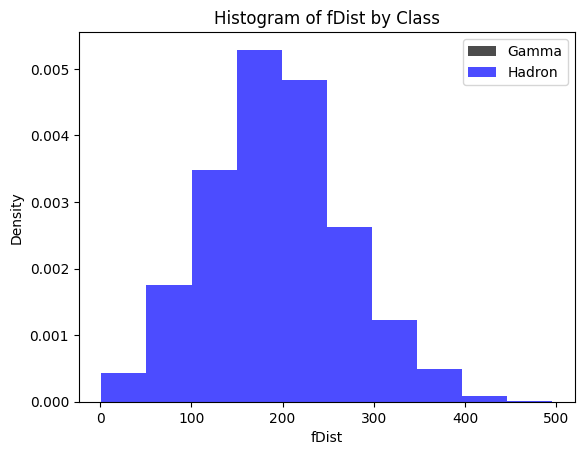

In [15]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="black", label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="blue", label='Hadron', alpha=0.7, density=True)

    plt.title(f"Histogram of {label} by Class")
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


## **data splitting**

In [ ]:
train, valid, test = np.split(
    df.sample(frac=1, random_state=42),  # shuffle the dataset
    [int(0.6 * len(df)), int(0.8 * len(df))]  # split indices at 60% and 80%
)


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values


  scaler = StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
print("Before oversampling")
print(len(train))
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

train,x_train,y_train = scale_dataset(train, oversample= True)
print("After oversampling")
print(len(y_train))
print(sum(y_train==1))
print(sum(y_train==0))


Before oversampling
11412
7409
4003
After oversampling
14818
7409
7409


In [ ]:
valid,x_valid,y_valid = scale_dataset(valid, oversample= False)
test,x_test,y_test = scale_dataset(test, oversample= False)

## **Model training - Naive Bayes VS KNN**

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1331
           1       0.85      0.86      0.85      2473

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(x_test)

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804

